In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [10]:
np.random.seed(32)
tips_10 = sns.load_dataset("tips").sample(10)

In [11]:
tips_10

,total_bill,tip,sex,smoker,day,time,size
33,20.69,2.45,Female,No,Sat,Dinner,4
114,25.71,4.00,Female,No,Sun,Dinner,3
206,26.59,3.41,Male,Yes,Sat,Dinner,3
149,7.51,2.00,Male,No,Thur,Lunch,2
20,17.92,4.08,Male,No,Sat,Dinner,2
87,18.28,4.00,Male,No,Thur,Lunch,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2
222,8.58,1.92,Male,Yes,Fri,Lunch,1
23,39.42,7.58,Male,No,Sat,Dinner,4
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [5]:
from numpy import NaN

In [12]:
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = NaN

In [13]:
tips_10

,total_bill,tip,sex,smoker,day,time,size
33,20.69,2.45,Female,No,Sat,Dinner,4
114,25.71,4.00,Female,No,Sun,Dinner,3
206,NaN,3.41,Male,Yes,Sat,Dinner,3
149,NaN,2.00,Male,No,Thur,Lunch,2
20,17.92,4.08,Male,No,Sat,Dinner,2
87,18.28,4.00,Male,No,Thur,Lunch,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2
222,NaN,1.92,Male,Yes,Fri,Lunch,1
23,NaN,7.58,Male,No,Sat,Dinner,4
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [14]:
count_sex = tips_10.groupby('sex').count()
count_sex

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,3,7,7,7,7,7
Female,3,3,3,3,3,3


In [15]:
def fill_na_mean(X):
    avg = X.mean()
    return X.fillna(avg)

In [16]:
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)

In [17]:
tips_10['fill_total_bill'] = total_bill_group_mean

In [18]:
tips_10

,total_bill,tip,sex,smoker,day,time,size,fill_total_bill
33,20.69,2.45,Female,No,Sat,Dinner,4,20.690000
114,25.71,4.00,Female,No,Sun,Dinner,3,25.710000
206,NaN,3.41,Male,Yes,Sat,Dinner,3,19.766667
149,NaN,2.00,Male,No,Thur,Lunch,2,19.766667
20,17.92,4.08,Male,No,Sat,Dinner,2,17.920000
87,18.28,4.00,Male,No,Thur,Lunch,2,18.280000
109,14.31,4.00,Female,Yes,Sat,Dinner,2,14.310000
222,NaN,1.92,Male,Yes,Fri,Lunch,1,19.766667
23,NaN,7.58,Male,No,Sat,Dinner,4,19.766667
189,23.10,4.00,Male,Yes,Sun,Dinner,3,23.100000


In [19]:
tips_10

,total_bill,tip,sex,smoker,day,time,size,fill_total_bill
33,20.69,2.45,Female,No,Sat,Dinner,4,20.690000
114,25.71,4.00,Female,No,Sun,Dinner,3,25.710000
206,NaN,3.41,Male,Yes,Sat,Dinner,3,19.766667
149,NaN,2.00,Male,No,Thur,Lunch,2,19.766667
20,17.92,4.08,Male,No,Sat,Dinner,2,17.920000
87,18.28,4.00,Male,No,Thur,Lunch,2,18.280000
109,14.31,4.00,Female,Yes,Sat,Dinner,2,14.310000
222,NaN,1.92,Male,Yes,Fri,Lunch,1,19.766667
23,NaN,7.58,Male,No,Sat,Dinner,4,19.766667
189,23.10,4.00,Male,Yes,Sun,Dinner,3,23.100000


### 데이터 필터링
> filter 메서드 ( p. 230 )

In [21]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
tips.shape

(244, 7)

In [23]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [24]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

<Axes: xlabel='size', ylabel='Count'>

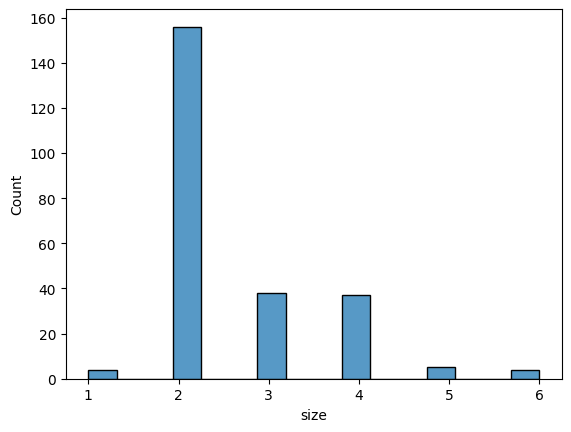

In [30]:
sns.histplot(x='size', data=tips)

In [31]:
tips_filtered = tips.groupby('size').filter(lambda x: x['size'].count() >= 30)

In [36]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [37]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [32]:
tips_filtered

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [38]:
tips_filtered['size'].value_counts()

size
2    156
3     38
4     37
Name: count, dtype: int64

In [41]:
tips_filtered.shape

(231, 7)

### 그룹 오브젝트
grouby의 결과 값인 그룹 오브젝트를 저장하고 살펴보기

In [42]:
tips_10 = sns.load_dataset("tips").sample(10, random_state = 42)
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [43]:
grouped = tips_10.groupby('sex').count()
grouped

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,7,7,7,7,7,7
Female,3,3,3,3,3,3


In [44]:
import pandas as pd

In [45]:
dt = pd.read_csv('../data/country_timeseries.csv')

In [46]:
dt

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
dt.sample(10, random_state=42)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
18,11/22/2014,245,NaN,7168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3016.0,NaN,NaN,NaN,NaN,NaN,NaN
45,10/1/2014,193,1199.0,3834.0,2437.0,20.0,1.0,1.0,NaN,NaN,739.0,2069.0,623.0,8.0,0.0,0.0,NaN,NaN
47,9/23/2014,185,1074.0,3458.0,2021.0,20.0,1.0,NaN,NaN,NaN,648.0,1830.0,605.0,8.0,0.0,NaN,NaN,NaN
89,6/1/2014,71,328.0,13.0,79.0,NaN,NaN,NaN,NaN,NaN,208.0,12.0,6.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
40,10/11/2014,203,NaN,4249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2458.0,NaN,NaN,NaN,NaN,NaN,NaN
62,8/16/2014,147,543.0,834.0,848.0,15.0,NaN,NaN,NaN,NaN,394.0,466.0,365.0,4.0,NaN,NaN,NaN,NaN
107,4/15/2014,24,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,10/27/2014,218,1906.0,NaN,5235.0,20.0,1.0,4.0,1.0,1.0,997.0,NaN,1500.0,8.0,0.0,1.0,0.0,1.0
55,9/9/2014,171,NaN,2407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
grouped = tips_10.groupby('sex')
grouped

In [49]:
grouped.groups

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}

In [50]:
avgs = grouped.mean()
avgs

TypeError: 'Categorical' with dtype category does not support reduction 'mean'